# Lake Bilancino

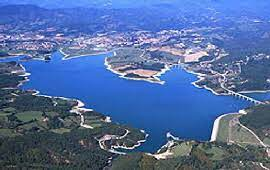

Lake is a large inland body of fresh water or salt water. Bilancino lake is an artificial lake near Barberino di Mugello in the Metropolitan City of Florence, Tuscany, Italy, made with a dam on the river Sieve. At an elevation of 252 m, the lake surface area is approximately 5 km².. It is used to refill the Arno river during the summer months. Indeed, during the winter months, the lake is filled up and then, during the summer months, the water of the lake is poured into the Arno river.

This competition have 9 dataset and below are the output or target to be predicted. Here I am taking only Lake Bilancino dataset for analysis and it has 2 targets

* lake level 
* flow rate 

to be predicted.

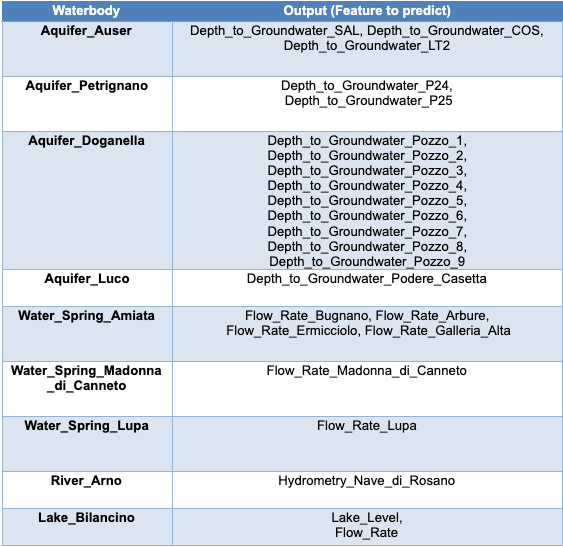

# Data Analysis

#### Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

sns.set_style('white')

C:\Users\Engr  Dasilva\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


#### Loading data

In [2]:
df = pd.read_csv('Datasets/Lake_Bilancino.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  6603 non-null   object 
 1   Rainfall_S_Piero      6026 non-null   float64
 2   Rainfall_Mangona      6026 non-null   float64
 3   Rainfall_S_Agata      6026 non-null   float64
 4   Rainfall_Cavallina    6026 non-null   float64
 5   Rainfall_Le_Croci     6026 non-null   float64
 6   Temperature_Le_Croci  6025 non-null   float64
 7   Lake_Level            6603 non-null   float64
 8   Flow_Rate             6582 non-null   float64
dtypes: float64(8), object(1)
memory usage: 464.4+ KB


The Lake_Bilancio dataset was gotten from the Acea Group competiton. It consists of 6603 rows and 9 columms for which 8 columns are in type float64, except the **Date** column which is in object type. 

In [4]:
df.Date = pd.to_datetime(df.Date)
df.set_index('Date', inplace = True)

The line of code above converts the **Date** column to a datetime datatype and places the column as the index of the dataset. This then makes the data a time-series data.


#### Exploratory Analysis

Exploratory Data Analysis is a method of evaluating or comprehending data in order to derive insights or key characteristics. For this we would apply graphical methods

In [5]:
df.head()

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
Date,,,,,,,,
2002-03-06,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2002-04-06,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2002-05-06,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2002-06-06,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2002-07-06,NaN,NaN,NaN,NaN,NaN,NaN,249.44,0.31


In [6]:
print('The data was recorded for almost 17 years\n')
print('Starting date:' , df.index[0],
      '\nEnding Date: ',df.index[-1])

The data was recorded for almost 17 years

Starting date: 2002-03-06 00:00:00 
Ending Date:  2020-06-30 00:00:00


In [7]:
df.isna().sum()

Rainfall_S_Piero        577
Rainfall_Mangona        577
Rainfall_S_Agata        577
Rainfall_Cavallina      577
Rainfall_Le_Croci       577
Temperature_Le_Croci    578
Lake_Level                0
Flow_Rate                21
dtype: int64

In [8]:
dfnull = df[df.Temperature_Le_Croci.isnull()]
print('Starting date of null value is :' , dfnull.index[0],
      '\nEnding Date of null value is :',dfnull.index[-1])

Starting date of null value is : 2002-03-06 00:00:00 
Ending Date of null value is : 2004-01-01 00:00:00


The data consists of almost 2 years of null data across the rainfall in the cities as well as the temperature on Le_Croci. The heatmap below gives a graphical representation of the null value distribution

<AxesSubplot:ylabel='Date'>

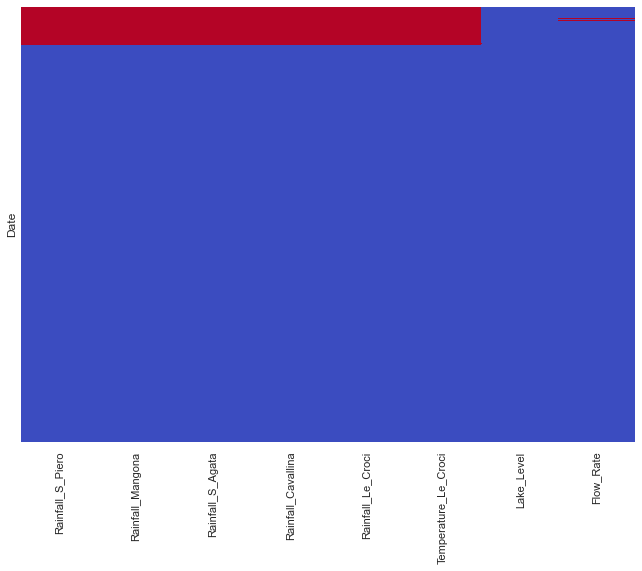

In [9]:
sns.set(rc={'figure.figsize':(11,8)})
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="coolwarm")

In [10]:
df.describe()

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
count,6026.000000,6026.000000,6026.000000,6026.000000,6026.000000,6025.000000,6603.000000,6582.000000
mean,2.471225,3.340657,2.670063,2.674743,3.129871,14.530141,249.564091,2.760968
std,6.650012,8.903134,7.166643,7.655847,8.025121,6.944029,2.172558,4.073428
min,0.000000,0.000000,0.000000,0.000000,0.000000,-5.350000,243.530000,0.310000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,248.000000,0.600000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,14.500000,250.200000,1.500000
75%,0.800000,1.400000,1.200000,0.600000,1.200000,20.100000,251.400000,3.000000
max,80.600000,110.000000,120.200000,113.600000,88.400000,34.000000,252.760000,74.650000


<AxesSubplot:>

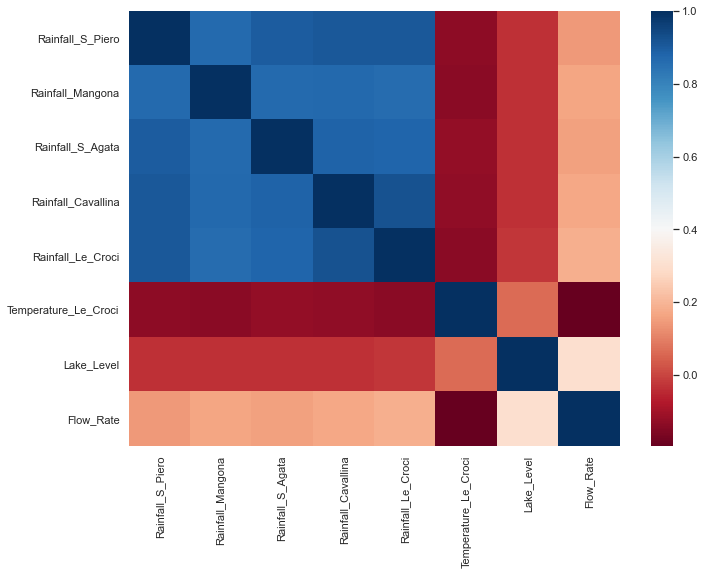

In [11]:
sns.heatmap(df.corr(), cmap = 'RdBu')

There is negative correlation between temperature and rainfall because the temperature decreases when there is rainfall and increases when there is no rain. The same applies to tempearature and flow rate.

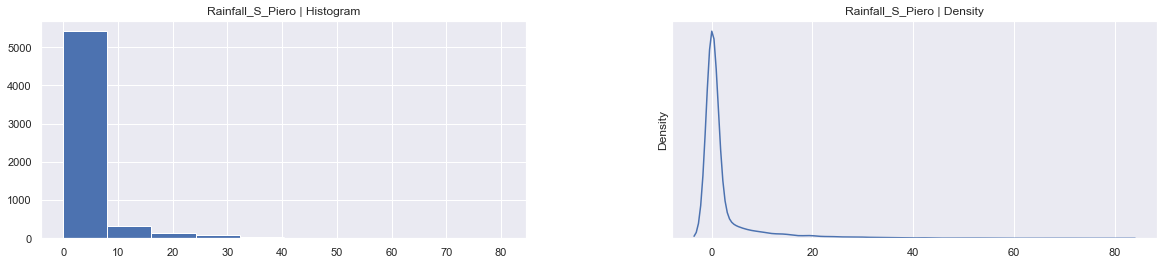

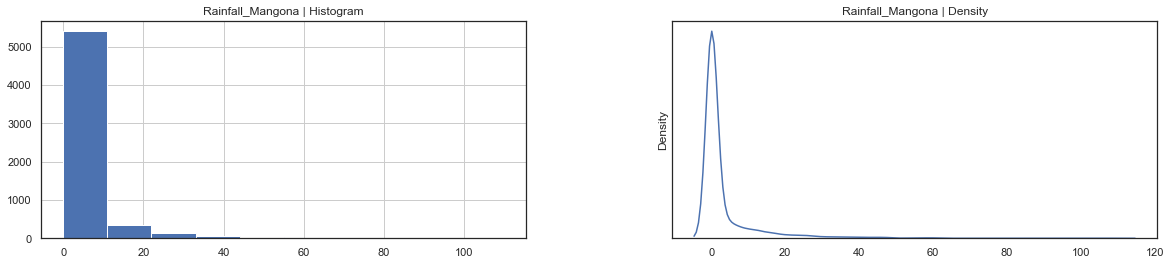

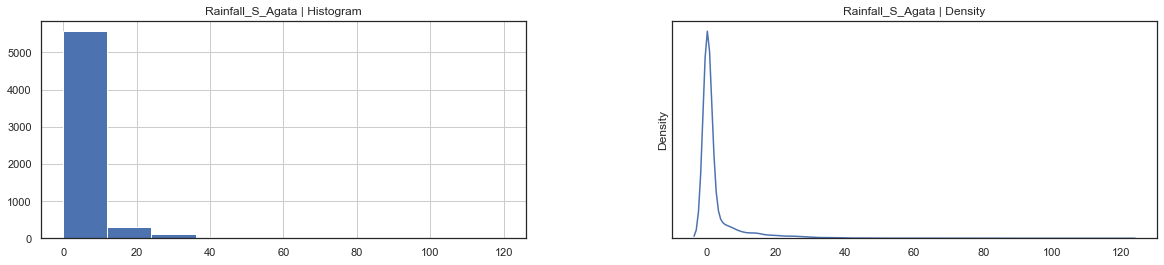

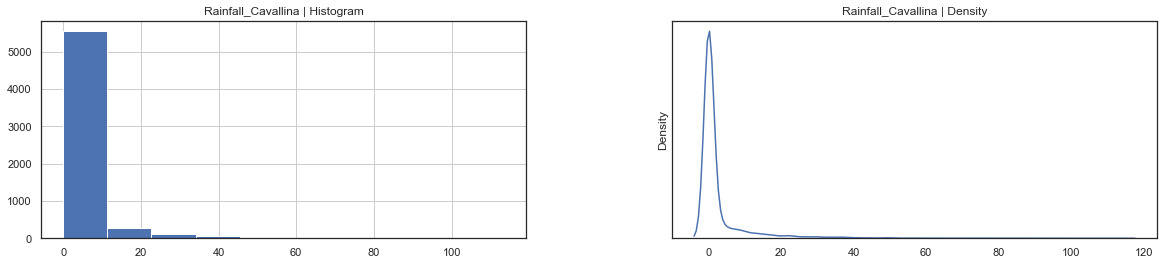

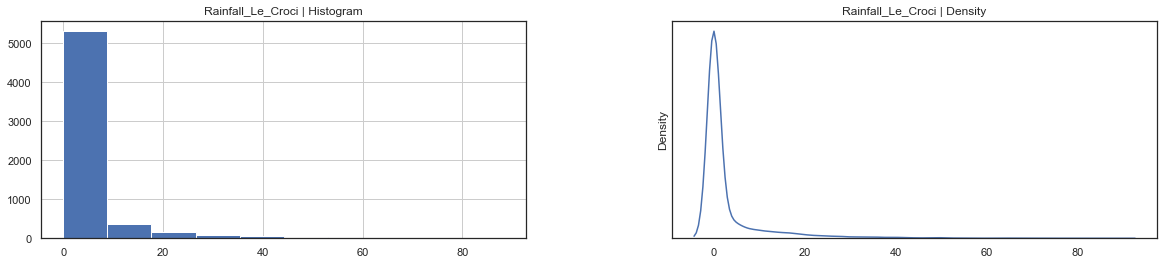

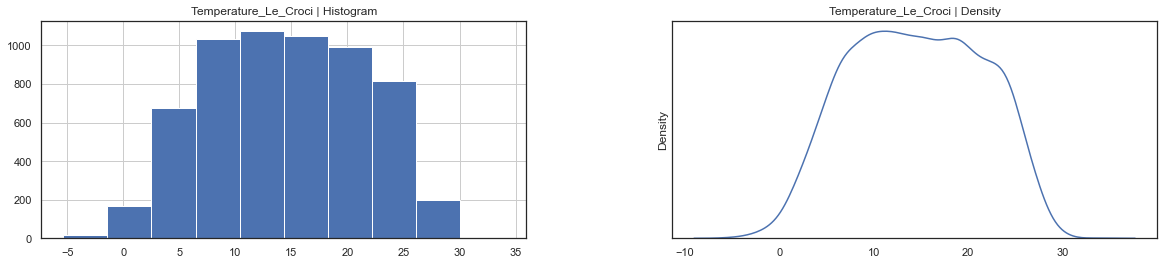

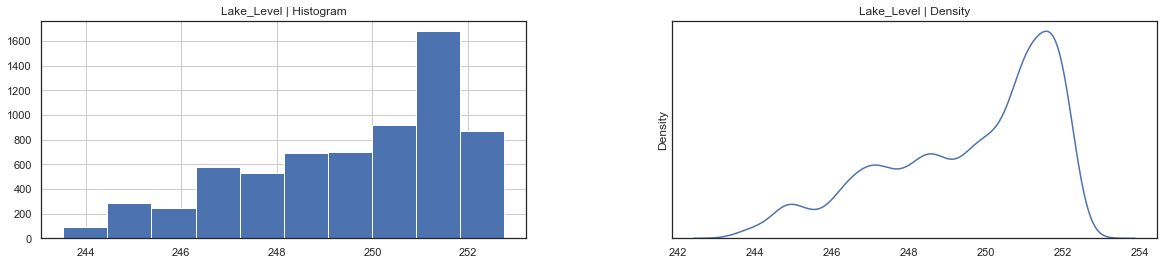

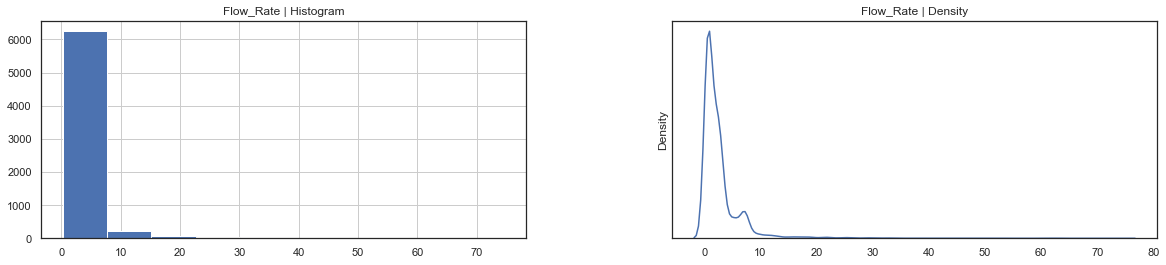

In [12]:
cols = ['Rainfall_S_Piero','Rainfall_Mangona','Rainfall_S_Agata','Rainfall_Cavallina','Rainfall_Le_Croci','Temperature_Le_Croci','Lake_Level','Flow_Rate']
for i in cols:
    fig, axes = plt.subplots(1, 2, figsize = (20, 4))
    df.hist(str(i), bins = 10, ax=axes[0])
    try: 
        sns.kdeplot(np.array(df[str(i)]))
    except: ValueError
    sns.set_style('white')    
    axes[1].set_yticklabels([])
    axes[1].set_yticks([])
    axes[0].set_title(i + " | Histogram")
    axes[1].set_title(i + " | Density")
    plt.show()


The distribution of the rainfall across the cities is skewed to the right.Histogram skewed to the right means that the peak of the graph lies to the left side of the center. On the right side of the graph, the frequencies of observations are lower than the frequencies of observations to the left side. Hence, why we see most of the distribution of less than 10. 

This observation also applies for flow rate. 

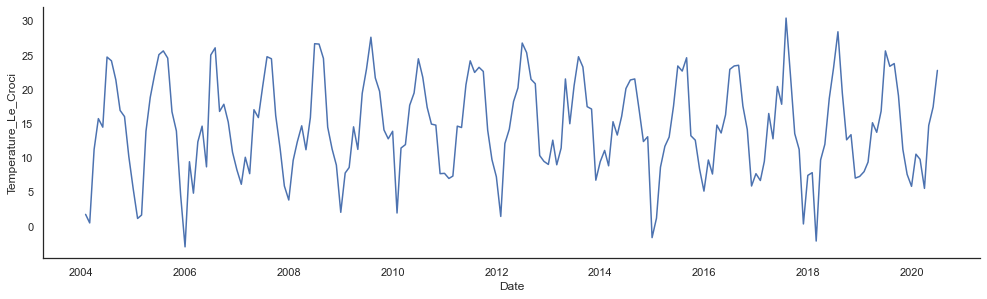

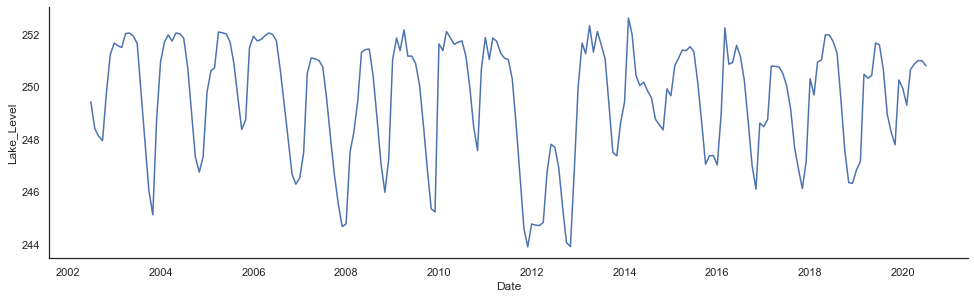

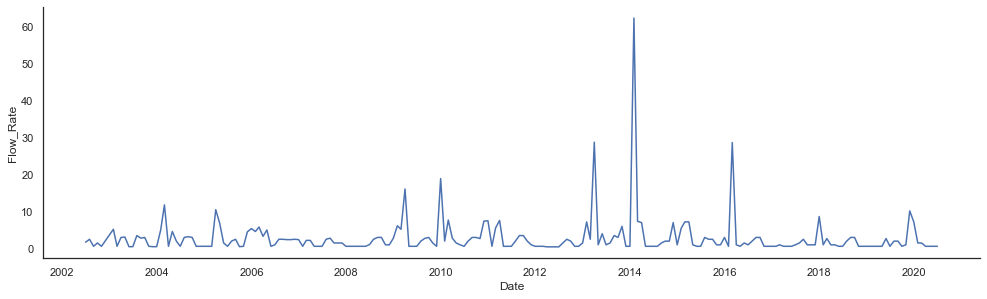

In [13]:
cols = ['Temperature_Le_Croci','Lake_Level','Flow_Rate']
for i in cols:
    dfk = df.asfreq('M')
    g = sns.relplot(data = dfk, x = dfk.index, y = dfk[str(i)], kind = 'line')
    g.fig.set_figwidth(15)
    g.fig.set_figheight(4)
    sns.set_style('white')
    plt.show()

In [14]:
df_new = df[['Lake_Level', 'Flow_Rate', 'Temperature_Le_Croci']].reset_index()
df_new['rainfall'] = df.iloc[:, :-3].sum(axis = 1).values
df_new['year'] = pd.to_datetime(df.index).year
df_new['month'] = pd.to_datetime(df.index).month

# Monthly dynamics
df_new['month_year'] = pd.to_datetime(df.index).map(lambda x: x.strftime('%Y/%m'))

lake_means = np.log(df_new.groupby('month_year').Flow_Rate.mean()).reset_index()
lake_means['month_year'] = pd.to_datetime(lake_means['month_year'])

lake_means_LL = df_new.groupby('month_year').Lake_Level.mean().reset_index()
lake_means_LL['month_year'] = pd.to_datetime(lake_means_LL['month_year'])

lake_rain = np.log(df_new.groupby('month_year').rainfall.mean()).reset_index()
lake_rain['month_year'] = pd.to_datetime(lake_rain['month_year'])

lake_temp = np.log(df_new.groupby('month_year').Temperature_Le_Croci.mean()).reset_index()
lake_temp['month_year'] = pd.to_datetime(lake_temp['month_year'])

# df_new.head(12)

In [15]:
df_new

,Date,Lake_Level,Flow_Rate,Temperature_Le_Croci,rainfall,year,month,month_year
0,2002-03-06,249.43,0.31,NaN,0.0,2002,3,2002/03
1,2002-04-06,249.43,0.31,NaN,0.0,2002,4,2002/04
2,2002-05-06,249.43,0.31,NaN,0.0,2002,5,2002/05
3,2002-06-06,249.43,0.31,NaN,0.0,2002,6,2002/06
4,2002-07-06,249.44,0.31,NaN,0.0,2002,7,2002/07
...,...,...,...,...,...,...,...,...
6598,2020-06-26,250.85,0.60,22.50,0.0,2020,6,2020/06
6599,2020-06-27,250.84,0.60,23.40,0.0,2020,6,2020/06
6600,2020-06-28,250.83,0.60,21.50,0.0,2020,6,2020/06
6601,2020-06-29,250.82,0.60,23.20,0.0,2020,6,2020/06


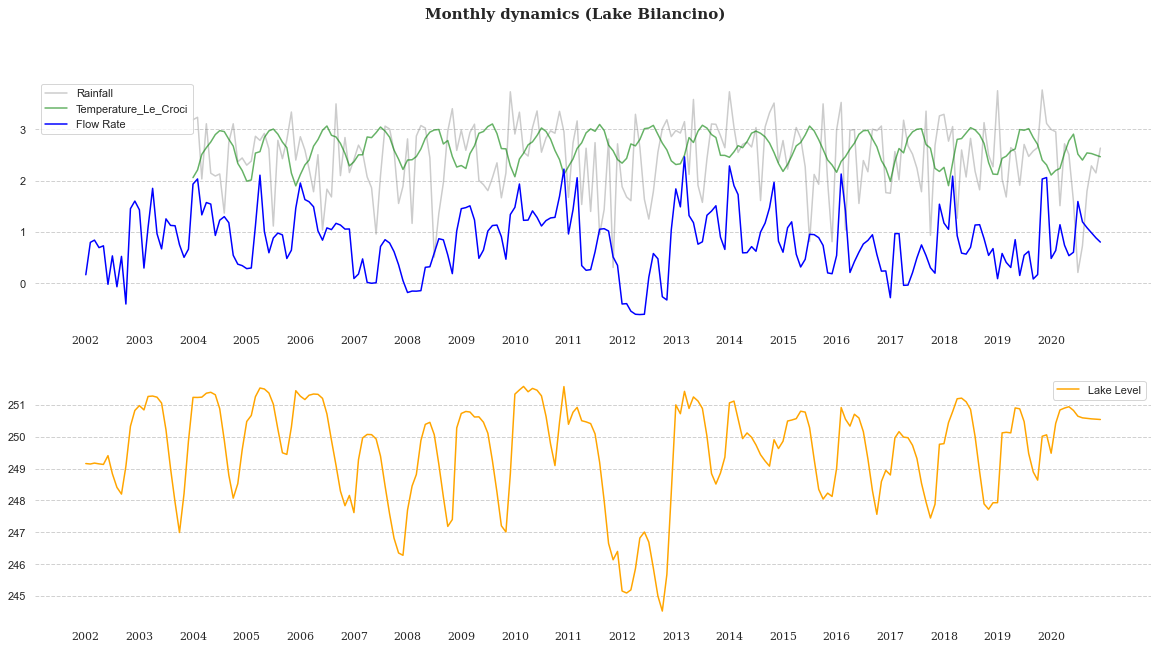

In [16]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (20, 10))
plt.suptitle('Monthly dynamics (Lake Bilancino)', size = 15, fontweight = 'bold', fontfamily = 'serif')

sns.lineplot(data = lake_rain, x = 'month_year', y = 'rainfall', ax = ax1, 
             color = 'gray', label = 'Rainfall', alpha = 0.4)
sns.lineplot(data = lake_temp, x = 'month_year', y = 'Temperature_Le_Croci', ax = ax1,
             color = 'green', label = 'Temperature_Le_Croci', alpha = 0.6)
sns.lineplot(data = lake_means, x = 'month_year', y = 'Flow_Rate', ax = ax1,
             color = 'blue', label = 'Flow Rate')
    
for i in ['top', 'right', 'bottom', 'left']:
        ax1.spines[i].set_visible(False)

ax1.set_xticks(lake_means.month_year[::12])
ax1.set_xticklabels(range(2002, 2021, 1), fontfamily = 'serif')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.grid(axis = 'y', linestyle = '--', alpha = 0.9)

sns.lineplot(data = lake_means_LL, x = 'month_year', y = 'Lake_Level', ax = ax2,
             color = 'orange', label = 'Lake Level')
    
for i in ['top', 'right', 'bottom', 'left']:
        ax2.spines[i].set_visible(False)

ax2.set_xticks(lake_means_LL.month_year[::12])
ax2.set_xticklabels(range(2002, 2021, 1), fontfamily = 'serif')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.grid(axis = 'y', linestyle = '--', alpha = 0.9)
plt.show()

The line graphs shows the average distribution of rainfall, temperature, flow rate and, lake level across the years. This graph shows a seasonal distribution of the data. As earlier, mentioned, when there is high rainfall, the temperature reduces and this can be seen in the graph above.

# Modelling


In [17]:
#Modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor , plot_importance, plot_tree

#model performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, ParameterGrid

#Supress warnings
import warnings
warnings.filterwarnings("ignore")

In [18]:
df1 = df.copy()
df1 = df1.dropna()

df1.reset_index(inplace=True)

df1.Date = pd.to_datetime(df1.Date)

df1['year'] = pd.DatetimeIndex(df1['Date']).year
df1['month'] = pd.DatetimeIndex(df1['Date']).month
df1['day'] = pd.DatetimeIndex(df1['Date']).day
df1['day_of_year'] = pd.DatetimeIndex(df1['Date']).dayofyear
df1['week_of_year'] = pd.DatetimeIndex(df1['Date']).weekofyear
df1['quarter'] = pd.DatetimeIndex(df1['Date']).quarter

df1.set_index('Date', inplace = True)

print(df1.shape)

(6025, 14)


In [29]:
df1.head(10)

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate,year,month,day,day_of_year,week_of_year,quarter
Date,,,,,,,,,,,,,,
2004-02-01,0.0,0.0,0.0,0.0,0.0,6.50,251.21,0.5,2004,2,1,32,5,1
2004-03-01,0.0,0.0,0.0,0.0,0.0,4.45,251.28,0.5,2004,3,1,61,10,1
2004-04-01,0.0,0.0,0.0,0.0,0.0,2.00,251.35,0.5,2004,4,1,92,14,2
2004-05-01,0.2,0.0,0.0,0.0,0.0,0.90,251.37,0.5,2004,5,1,122,18,2
2004-06-01,0.0,0.0,0.0,0.0,0.0,2.25,251.42,0.5,2004,6,1,153,23,2
2004-07-01,0.0,0.0,0.0,0.0,0.0,3.65,251.43,0.5,2004,7,1,183,27,3
2004-08-01,0.0,0.8,0.0,0.0,0.0,3.35,251.45,0.5,2004,8,1,214,31,3
2004-09-01,4.6,5.8,3.8,5.6,7.8,5.55,251.49,0.5,2004,9,1,245,36,3
2004-10-01,0.0,0.0,0.0,0.0,0.0,6.10,251.52,0.5,2004,10,1,275,40,4


In [68]:
def prep_target_bilancino(df, target='Flow_Rate'):

    """
    This function prepares the cleaned Bilancino dataset for modelling
    """
    #Isolate the column name as specified in the variable
    target_name = [t for t in df.columns if target in t]
    
    #Initiate a list that wil contain names of relevant columns
    targets = [] + target_name
    
    #Iterate through the entire column names and find relevant columns, then append to above list
    for col in df.columns:
        if 'Flow_Rate' not in col:
            if 'Lake_Level' not in col:
                targets.append(col)
    df = df[targets]
    
    #df.set_index('Date', inplace = True)

    #Drop NaN rows
    df = df.dropna()

    #Split to training and test
    y = df[target_name].iloc[:,0] #Needed to convert the dataframe target to a Series
    X = df.drop(target_name, axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)
    
    return X_train, X_test, y_train, y_test

In [67]:
prep_target_bilancino(df1, target='Flow_Rate')

['Flow_Rate',
 'Rainfall_S_Piero',
 'Rainfall_Mangona',
 'Rainfall_S_Agata',
 'Rainfall_Cavallina',
 'Rainfall_Le_Croci',
 'Temperature_Le_Croci',
 'year',
 'month',
 'day',
 'day_of_year',
 'week_of_year',
 'quarter']

In [75]:
a,b,c,d = prep_target_bilancino(df1, target='Flow_Rate')
#a= prep_target_bilancino(df1, target='Flow_Rate')
d

Date
2013-06-28    1.00
2012-03-28    0.45
2007-10-31    1.50
2009-03-23    1.99
2017-01-10    1.00
              ... 
2018-11-10    2.00
2016-07-21    2.00
2005-01-25    0.60
2004-08-22    3.50
2008-07-26    2.00
Name: Flow_Rate, Length: 1205, dtype: float64

In [24]:
# Split the dataset into the response, y, and features, X for the first output
y1 = df1[['Flow_Rate']]
X1 = df1.drop(['Lake_Level', 'Flow_Rate'], axis = 1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, train_size = 0.7)

In [25]:
model = XGBRegressor()
model.fit(X_train1, y_train1)
prediction = model.predict(X_test1)

In [26]:
#Loading saved model file

import pickle

model_save_path = "XG_model_Bilancino_FlowRate.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(model,file)

### Lake Level

Fitting Linear Regression model...
... predicting
... scoring
Fitting Decision Tree Regressor model...
... predicting
... scoring
Fitting Support Vector Regressor model...
... predicting
... scoring
Fitting XG Regressor model...
... predicting
... scoring
Fitting AdaBoost model...
... predicting
... scoring
Fitting Random Forest Regressor model...
... predicting
... scoring
... All done!


,R^2,MSE Value,RMSE,MAE,Train Time
Regressor,,,,,
Linear Regression,0.142715,4.089831,2.022333,1.631535,0.001904
Decision Tree Regressor,0.920011,0.381602,0.617739,0.220365,0.020363
Support Vector Regressor,0.050802,4.528316,2.127984,1.641043,0.792278
XG Regressor,0.930521,0.331463,0.575728,0.361715,0.202898
AdaBoost,0.428142,2.728149,1.651711,1.391237,0.062553
Random Forest Regressor,0.943670,0.268731,0.518393,0.265515,1.253426


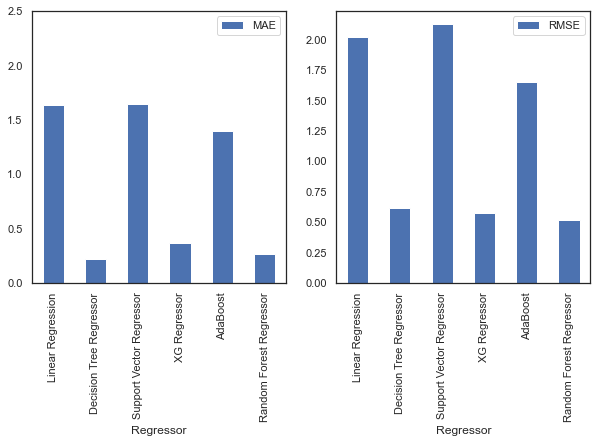

In [30]:
names = ['Linear Regression', 'Decision Tree Regressor', 
         'Support Vector Regressor', 'XG Regressor',  'AdaBoost', 'Random Forest Regressor']

regressors = [
    LinearRegression(), 
    DecisionTreeRegressor(),
    SVR(), 
    XGBRegressor(),    
    AdaBoostRegressor(), 
    RandomForestRegressor()]

# Split the dataset into the response, y, and features, X for the first output
y1 = df1[['Lake_Level']]
X1 = df1.drop(['Lake_Level', 'Flow_Rate'], axis = 1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, train_size = 0.7)

# cutoff = int(len(X1)*0.8)
# X_train1, y_train1 = X1.iloc[:cutoff], y1.iloc[:cutoff]
# X_test1, y_test1 = X1.iloc[cutoff:], y1.iloc[cutoff:]

names = ['Linear Regression', 'Decision Tree Regressor', 'Support Vector Regressor', 'XG Regressor',  'AdaBoost', 'Random Forest Regressor']

regressors = [LinearRegression(), DecisionTreeRegressor(), SVR(), XGBRegressor(), AdaBoostRegressor(), RandomForestRegressor()]

results1 = []

models = {}

for name, clf in zip(names, regressors):    
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train1, y_train1)
    
    print ('... predicting')
    y_pred1 = clf.predict(X_train1)   
    pred_test1 = clf.predict(X_test1)
    
    print ('... scoring')
    #Evaluating R^2 and RMSE values
    R2_1 = r2_score(y_test1, pred_test1)
    MSE_1 = mean_squared_error(y_test1, pred_test1)
    RMSE_1 = np.sqrt(mean_squared_error(y_test1, pred_test1))   
    MAE = mean_absolute_error(y_test1, pred_test1)
    
    # Save the results to dictionaries
    models[name] = clf
    
    results1.append([name, R2_1, MSE_1, RMSE_1, MAE, run_time.best])

    
results1_df = pd.DataFrame(results1, columns=['Regressor', 'R^2', 'MSE Value', 'RMSE', 'MAE', 'Train Time'])
results1_df.set_index('Regressor', inplace= True)

print ('... All done!')
display(results1_df)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
#results.sort_values('F1 Train', ascending=False, inplace=True)
results1_df.plot(y=['MAE'], kind='bar', ax=ax[0], xlim=[0,1.1], ylim=[0.0,2.5])
results1_df.plot(y='RMSE', kind='bar', ax=ax[1])
plt.legend()#loc='upper left'

In [33]:
regressors[1]

DecisionTreeRegressor()

NameError: name 'supportvector_model' is not defined

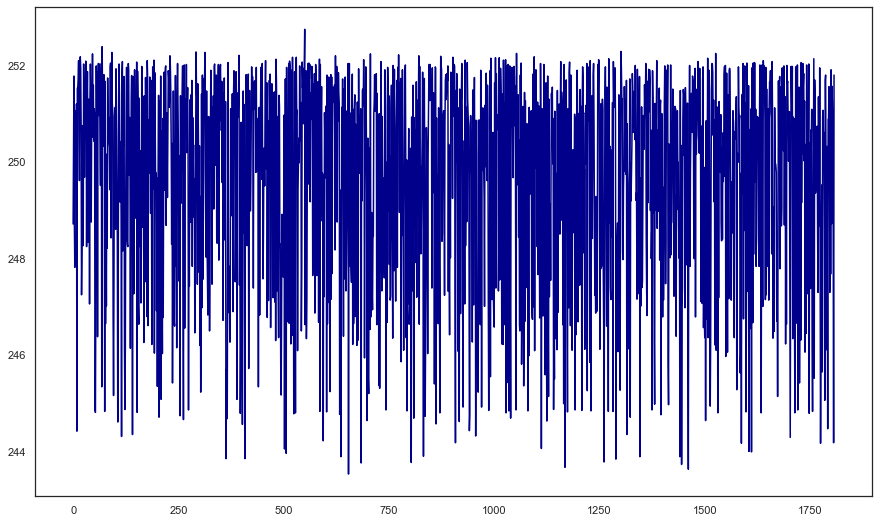

In [31]:
#Creating a plot that compares actual y_val with AdaBoost Predicted values
fig = plt.figure(figsize =(15, 9))
plt.plot(np.arange(len(y_test1)), y_test1, color='darkblue', label = 'Actual Flowrate')
plt.plot(np.arange(len(y_test1)), supportvector_model.predict(X_test1), color="red", label = 'XG Boost Predictions')
plt.title("Recorded Flowrate & Predicted Flowrate over time", fontsize=18)

plt.xlabel("time(Days)")
plt.ylabel("Flowrate")
plt.legend(loc='upper right')
plt.show()

In [124]:
XGBoost_model = models['XG Regressor']

import pickle

model_save_path = "XGBoost_model_Bilancino.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(supportvector_model,file)

Observation

The determinants of the performance of each model used is RMSE and MAE. RMSE is one of the most commonly used measures for evaluating the quality of predictions. It shows how far predictions fall from measured true values using Euclidean distance. In order words, we are looking for a model which gave a lower RMSE and MAE score.

For Lake level, linear model outperformed, with an RMSE score of 1.760 and runtime of 0.002502.

### Flow Rate

Fitting Linear Regression model...
... predicting
... scoring
Fitting Decision Tree Regressor model...
... predicting
... scoring
Fitting Support Vector Regressor model...
... predicting
... scoring
Fitting XG Regressor model...
... predicting
... scoring
Fitting AdaBoost model...
... predicting
... scoring
Fitting Random Forest Regressor model...
... predicting
... scoring
... All done!


,R^2,MSE Value,RMSE,MAE,Train Time
Regressor,,,,,
Linear Regression,0.077136,14.706315,3.834881,2.236558,0.001909
Decision Tree Regressor,-0.658643,26.431336,5.141142,2.661425,0.011556
Support Vector Regressor,-0.079067,17.195494,4.146745,1.991262,0.864536
XG Regressor,-0.136144,18.105053,4.255003,2.380673,0.213867
AdaBoost,-6.808260,124.428707,11.154762,10.318089,0.149549
Random Forest Regressor,-0.025336,16.339272,4.042187,2.321190,0.754291


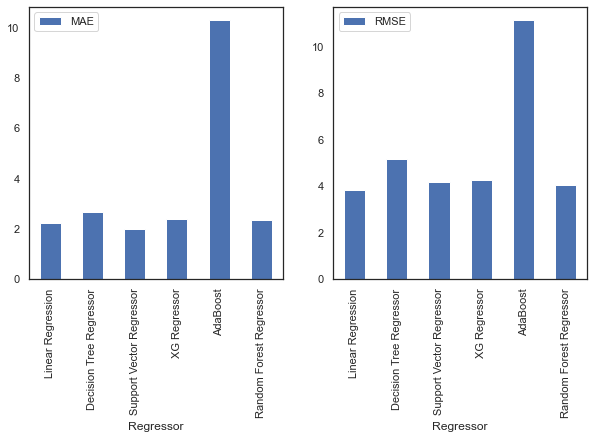

In [23]:
y2 = df1[['Flow_Rate']]
X2 = df1.drop(['Lake_Level', 'Flow_Rate'],axis = 1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, train_size = 0.7)

names1 = ['Linear Regression', 'Decision Tree Regressor', 'Support Vector Regressor', 'XG Regressor',  'AdaBoost', 'Random Forest Regressor']

regressors1 = [LinearRegression(), DecisionTreeRegressor(), SVR(), XGBRegressor(), AdaBoostRegressor(), RandomForestRegressor()]

results2 = []

models2 = {}

for name, clf in zip(names1, regressors1):    
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train2, y_train2)
    
    print ('... predicting')
    y_pred2 = clf.predict(X_train2)   
    pred_test2 = clf.predict(X_test2)
    
    print ('... scoring')
    #Evaluating R^2 and RMSE values
    R2_2 = r2_score(y_test2, pred_test2)
    MSE_2 = mean_squared_error(y_test2, pred_test2)
    RMSE_2 = np.sqrt(mean_squared_error(y_test2, pred_test2))   
    MAE2 = mean_absolute_error(y_test2, pred_test2)
    
    # Save the results to dictionaries
    models2[name] = clf
    
    results2.append([name, R2_2, MSE_2, RMSE_2, MAE2, run_time.best])

    
results2_df = pd.DataFrame(results2, columns=['Regressor', 'R^2', 'MSE Value', 'RMSE', 'MAE', 'Train Time'])
results2_df.set_index('Regressor', inplace= True)

print ('... All done!')
display(results2_df)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
#results.sort_values('F1 Train', ascending=False, inplace=True)
results2_df.plot(y=['MAE'], kind='bar', ax=ax[0])
results2_df.plot(y='RMSE', kind='bar', ax=ax[1])
plt.legend(loc='upper left')

##### Observation

For flow rate, SVM gave a better performance, with an RMSE score of 3.542 with runtime 0.96. Although it gave the best result, it took the longest time to run.

### Feature Importance For Lake Level

In [76]:
model_ll = XGBRegressor()
model_ll.fit(X_train1, y_train1)
model_ll.get_booster().get_score()

{'Rainfall_S_Piero': 568.0,
 'Rainfall_Mangona': 334.0,
 'Rainfall_S_Agata': 232.0,
 'Rainfall_Cavallina': 248.0,
 'Rainfall_Le_Croci': 252.0,
 'Temperature_Le_Croci': 984.0,
 'year': 778.0,
 'month': 207.0,
 'day': 603.0,
 'day_of_year': 538.0,
 'week_of_year': 160.0}

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

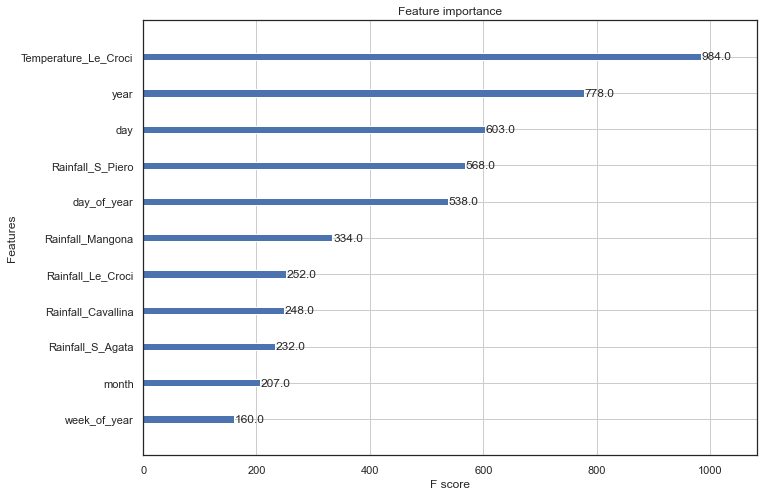

In [77]:
plot_importance(model_ll)

### Feature Importance for Flow Rate

In [28]:
model_rf = XGBRegressor()
model_rf.fit(X_train2, y_train2)
model_rf.get_booster().get_score()

{'Rainfall_S_Piero': 888.0,
 'Rainfall_Mangona': 625.0,
 'Rainfall_S_Agata': 452.0,
 'Rainfall_Cavallina': 391.0,
 'Rainfall_Le_Croci': 452.0,
 'Temperature_Le_Croci': 1404.0}

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

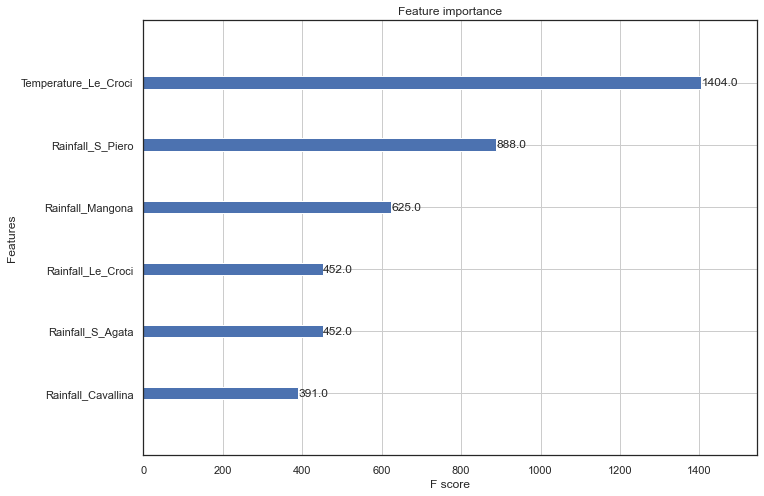

In [29]:
plot_importance(model_rf)

##### Conclusion

So far we have analysed the data set and observed that distribution of rainfall is positively skewed. The factors (rainfall, temperature) and our target variables (lake_level and flow_rate), showed a seasonal occurence, which meant that more water is gotten in the colder months than in the warmer months.

We recommend that the Acea Group use the Linear Model o